# Recalls from 2019
# Katie Briggs
# DSC 550

In [1]:
# import libraries 
from bs4 import BeautifulSoup 

In [9]:
# Reading the data inside the xml 
# file to a variable under the name  
# recall_data 
recall_data = open('recalls2019.xml', encoding="utf8")

In [10]:
# Passing the stored data inside 
# the beautifulsoup parser, storing 
# the returned object  
Bs_data2 = BeautifulSoup(recall_data, "xml")

In [11]:
# Finding all instances of tag  
# `recall` 
bs_recall = Bs_data2.find_all("recall") 
  
print(bs_recall) 

[<recall>
<Brand>Aurobindo Pharma USA, Inc.</Brand>
<Company>Aurobindo Pharma USA, Inc.</Company>
<Date>12/31/19</Date>
<ProductDescription>Mirtazapine Tablets 7.5 mg</ProductDescription>
<Reason>Due to a label error on declared strength-bottles labeled as Mirtazapine 7.5 mg</Reason>
<Url>https://www.fda.gov/safety/recalls-market-withdrawals-safety-alerts/aurobindo-pharma-usa-inc-issues-voluntary-nationwide-recall-mirtazapine-tablets-lot-number</Url>
</recall>, <recall>
<Brand>None</Brand>
<Company>Meijer</Company>
<Date>12/31/19</Date>
<ProductDescription>Hard-boiled eggs</ProductDescription>
<Reason>Product has the potential to be contaminated with Listeria monocytogenes</Reason>
<Url>https://www.fda.gov/safety/recalls-market-withdrawals-safety-alerts/meijer-recalls-diced-hard-boiled-eggs-due-potential-health-risks-product-bought-two-stores-grand</Url>
</recall>, <recall>
<Brand>Sienna Bakery</Brand>
<Company>Dianne’s Fine Desserts</Company>
<Date>12/31/19</Date>
<ProductDescription>

In [12]:
# Find all products that have been recalled
b_product2 = Bs_data2.find_all("ProductDescription") 
  
print(b_product2)

[<ProductDescription>Mirtazapine Tablets 7.5 mg</ProductDescription>, <ProductDescription>Hard-boiled eggs</ProductDescription>, <ProductDescription>Chocolate Turtle Brownie</ProductDescription>, <ProductDescription>Protein pack and avocado toast</ProductDescription>, <ProductDescription>Veggie Ramen with Chicken Broth</ProductDescription>, <ProductDescription>Clover Sprouts</ProductDescription>, <ProductDescription>Snack kits containing hard boiled eggs</ProductDescription>, <ProductDescription>Salads and Remoulade</ProductDescription>, <ProductDescription>Egg salad sandwiches</ProductDescription>, <ProductDescription>Egg salad and potato salad</ProductDescription>, <ProductDescription>All hard-boiled eggs manufactured at the firm’s Gainesville, Georgia facility, including all retail, pillow pack, pouch pack, frozen diced, and protein kit products</ProductDescription>, <ProductDescription>Dark Chocolate Peppermint Sandwich Cremes &amp; Dark Chocolate Caramel Sea Salt Sandwich Cremes</

In [26]:
# import libraries to place tags into dataframe
import xml.etree.ElementTree as et 
import pandas as pd

In [28]:
tree = et.parse('recalls2019.xml')
root = tree.getroot()

In [29]:
# create the columns for the dataframe
df_cols2 = ["Brand", "Company", "ProductDescription", "Reason"]
rows2 = []

In [30]:
for node in root: 
    s_brand = node.attrib.get("Brand")
    s_company = node.find("Company") 
    s_product = node.find("ProdcutDescription")
    s_reason = node.find("Reason")

In [32]:
rows2.append({"Brand": s_brand, "Company": s_company, 
                 "ProductDescription": s_product, "Reason": s_reason})

In [34]:
out2_df = pd.DataFrame(rows2, columns = df_cols2)
out2_df

,Brand,Company,ProductDescription,Reason
0,None,[],None,[]


In [36]:
def getvalueofnode(node):
    """ return node text or None for error handling"""
    return node.text if node is not None else None
 
 
def main():
    """ main """
    parsed_xml = et.parse("recalls2019.xml")
    dfcols = ['Brand', 'Company', 'ProductDescription', 'Reason']
    df_xml = pd.DataFrame(columns=dfcols)
 
    for node in parsed_xml.getroot():
        name = node.attrib.get('Brand')
        email = node.find('Company')
        phone = node.find('ProductDescription')
        street = node.find('Reason')
 
        df_xml = df_xml.append(
            pd.Series([name, getvalueofnode(email), getvalueofnode(phone),
                       getvalueofnode(street)], index=dfcols),
            ignore_index=True)
 
    print(df_xml)
 
main()

    Brand                          Company  \
0    None       Aurobindo Pharma USA, Inc.   
1    None                           Meijer   
2    None           Dianne’s Fine Desserts   
3    None           FiveStar Gourmet Foods   
4    None                Veggie Noodle Co.   
..    ...                              ...   
370  None                   Shamrock Farms   
371  None           Olde York Potato Chips   
372  None  Torrent Pharmaceuticals Limited   
373  None       Oskri Organics Corporation   
374  None                  Results RNA LLC   

                          ProductDescription  \
0                 Mirtazapine Tablets 7.5 mg   
1                           Hard-boiled eggs   
2                   Chocolate Turtle Brownie   
3             Protein pack and avocado toast   
4            Veggie Ramen with Chicken Broth   
..                                       ...   
370  2% Reduced Fat Vanilla Half Gallon Milk   
371                        Wavy Potato Chips   
372          Lo

In [44]:
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [56]:
# Parse the data 
df2 = parse_XML("recalls2019.xml", ["Brand", "Company", "ProductDescription", "Reason"])
df2

,Brand,Company,ProductDescription,Reason
0,None,"Aurobindo Pharma USA, Inc.",Mirtazapine Tablets 7.5 mg,Due to a label error on declared strength-bott...
1,None,Meijer,Hard-boiled eggs,Product has the potential to be contaminated w...
2,None,Dianne’s Fine Desserts,Chocolate Turtle Brownie,May contain undeclared peanuts
3,None,FiveStar Gourmet Foods,Protein pack and avocado toast,Potential to be contaminated with Listeria mon...
4,None,Veggie Noodle Co.,Veggie Ramen with Chicken Broth,Product has the potential to be contaminated w...
...,...,...,...,...
370,None,Shamrock Farms,2% Reduced Fat Vanilla Half Gallon Milk,Undeclared Almonds
371,None,Olde York Potato Chips,Wavy Potato Chips,Undeclared Milk
372,None,Torrent Pharmaceuticals Limited,"Losartan potassium tablets, USP",Due to the detection of trace amounts of N-nit...
373,None,Oskri Organics Corporation,Organic Sunflower Butter,Potential to be contaminated with Listeria mon...


In [48]:
df2['ProductDescription'].value_counts()[:20]

Flour                                                                                       5
Losartan Potassium USP                                                                      4
Pig ears                                                                                    4
Canned Dog Food                                                                             3
Unbleached All-Purpose Flour                                                                3
Three Berry Blend                                                                           2
Over-The-Counter Ophthalmic Products                                                        2
Losartan potassium tablets, USP; Losartan potassium and Hydrochlorothiazide tablets, USP    2
PECGEN DMX, 16 oz, liquid cough syrup                                                       2
Tahini                                                                                      2
Chicken salad sandwiches                                    

In [49]:
import matplotlib.pyplot as plt

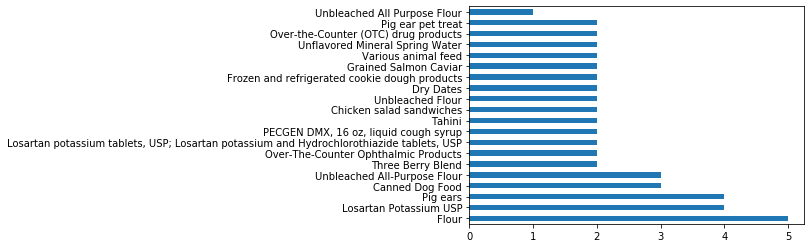

In [51]:
# plot with most recalled items
df2['ProductDescription'].value_counts()[:20].plot(kind='barh')

In [53]:
# find companies with the most recalled items
df2['Company'].value_counts()[:20]

Whole Foods Market                 7
Altaire Pharmaceuticals, Inc.      6
Torrent Pharmaceuticals Limited    5
Legacy Pharmaceutical Packaging    4
Norbrook Laboratories Limited      3
Lipari Foods                       3
Meijer                             3
King Arthur Flour, Inc.            3
UNFI                               3
ICU Medical, Inc.                  3
ALDI                               3
Peekay International Inc.          3
Altaire Pharmaceuticals Inc.       2
Dog Goods USA LLC                  2
Hometown Food Company              2
Grand Strand Sandwich Company      2
American Health Packaging          2
KRS Global Biotechnology           2
Aurobindo Pharma USA, Inc.         2
California New Foods               2
Name: Company, dtype: int64

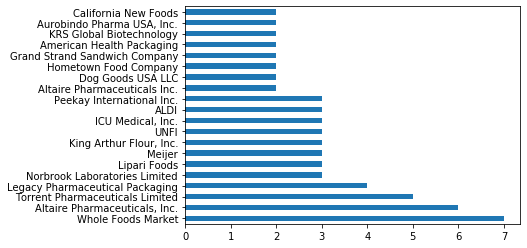

In [55]:
#plot the companies with the most recalled items
df2['Company'].value_counts()[:20].plot(kind='barh')

In [94]:
# apply frequent item mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df2.head()

,Brand,Company,ProductDescription,Reason,id
0,None,"Aurobindo Pharma USA, Inc.",Mirtazapine Tablets 7.5 mg,Due to a label error on declared strength-bott...,1
1,None,Meijer,Hard-boiled eggs,Product has the potential to be contaminated w...,2
2,None,Dianne’s Fine Desserts,Chocolate Turtle Brownie,May contain undeclared peanuts,3
3,None,FiveStar Gourmet Foods,Protein pack and avocado toast,Potential to be contaminated with Listeria mon...,4
4,None,Veggie Noodle Co.,Veggie Ramen with Chicken Broth,Product has the potential to be contaminated w...,5


In [95]:
df2["id"] = df2.index + 1

In [96]:
df2

,Brand,Company,ProductDescription,Reason,id
0,None,"Aurobindo Pharma USA, Inc.",Mirtazapine Tablets 7.5 mg,Due to a label error on declared strength-bott...,1
1,None,Meijer,Hard-boiled eggs,Product has the potential to be contaminated w...,2
2,None,Dianne’s Fine Desserts,Chocolate Turtle Brownie,May contain undeclared peanuts,3
3,None,FiveStar Gourmet Foods,Protein pack and avocado toast,Potential to be contaminated with Listeria mon...,4
4,None,Veggie Noodle Co.,Veggie Ramen with Chicken Broth,Product has the potential to be contaminated w...,5
...,...,...,...,...,...
370,None,Shamrock Farms,2% Reduced Fat Vanilla Half Gallon Milk,Undeclared Almonds,371
371,None,Olde York Potato Chips,Wavy Potato Chips,Undeclared Milk,372
372,None,Torrent Pharmaceuticals Limited,"Losartan potassium tablets, USP",Due to the detection of trace amounts of N-nit...,373
373,None,Oskri Organics Corporation,Organic Sunflower Butter,Potential to be contaminated with Listeria mon...,374


In [116]:
basket = (df2[df2['ProductDescription'] =="Flour"]
          .groupby(['id', 'Company'])['Reason']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))
basket

Company,ADM Milling Co.,ALDI,Hometown Food,Hometown Food Company
id,,,,
216,0,0,0,E.coli
239,0,E. coli,0,0
241,E. coli,0,0,0
246,0,E.coli,0,0
316,0,0,Salmonella,0


In [117]:
def encode_units(x):
    if x == 0:   
        return 0
    if x != 0:
        return 1
basket_sets = basket.applymap(encode_units)
#basket_sets.drop('Company', inplace=True, axis=1)
basket_sets

Company,ADM Milling Co.,ALDI,Hometown Food,Hometown Food Company
id,,,,
216,0,0,0,1
239,0,1,0,0
241,1,0,0,0
246,0,1,0,0
316,0,0,1,0


In [118]:
import numpy as np

frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [119]:
rules[ (rules['lift'] >= 2) &
      (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
